In [51]:
#예제-6-5 # 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN
#
#
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)
import tensorflow.compat.v1 as tf # 텐서 이전버전의 라이브러리를 쓸 수 있도록 세팅하는 import로 추정됨 
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)

import tensorflow as tf

In [52]:
# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()
    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [53]:
import numpy as np
# sin 함수 학습 데이터 ❶
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]
print(x)
print(train_y)

[-10.0, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.500000000000002, -9.400000000000002, -9.300000000000002, -9.200000000000003, -9.100000000000003, -9.000000000000004, -8.900000000000004, -8.800000000000004, -8.700000000000005, -8.600000000000005, -8.500000000000005, -8.400000000000006, -8.300000000000006, -8.200000000000006, -8.100000000000007, -8.000000000000007, -7.9000000000000075, -7.800000000000008, -7.700000000000008, -7.6000000000000085, -7.500000000000009, -7.400000000000009, -7.30000000000001, -7.20000000000001, -7.10000000000001, -7.000000000000011, -6.900000000000011, -6.800000000000011, -6.700000000000012, -6.600000000000012, -6.500000000000012, -6.400000000000013, -6.300000000000013, -6.2000000000000135, -6.100000000000014, -6.000000000000014, -5.900000000000015, -5.800000000000015, -5.700000000000015, -5.600000000000016, -5.500000000000016, -5.400000000000016, -5.300000000000017, -5.200000000000017, -5.100000000000017, -5.000000000000018, -4.900000000000018, 

In [54]:
# 하이퍼파라미터 ❷
n_timesteps = 15
n_features = 1

# 시퀀스 나누기 ➌
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))
print("first sequence:", train_x[0], "predict this value from first sequence:", train_y[0], "second sequence:", train_x[1])

shape x:(185, 15) / y:(185,)
first sequence: [ 0.54402111  0.45753589  0.36647913  0.27176063  0.17432678  0.07515112
 -0.02477543 -0.12445442 -0.22288991 -0.31909836 -0.41211849 -0.50102086
 -0.58491719 -0.66296923 -0.7343971 ] predict this value: -0.798487112623487 second sequence: [ 0.45753589  0.36647913  0.27176063  0.17432678  0.07515112 -0.02477543
 -0.12445442 -0.22288991 -0.31909836 -0.41211849 -0.50102086 -0.58491719
 -0.66296923 -0.7343971  -0.79848711]


In [55]:
train_x

array([[ 0.54402111,  0.45753589,  0.36647913, ..., -0.58491719,
        -0.66296923, -0.7343971 ],
       [ 0.45753589,  0.36647913,  0.27176063, ..., -0.66296923,
        -0.7343971 , -0.79848711],
       [ 0.36647913,  0.27176063,  0.17432678, ..., -0.7343971 ,
        -0.79848711, -0.85459891],
       ...,
       [ 0.94073056,  0.90217183,  0.85459891, ...,  0.02477543,
        -0.07515112, -0.17432678],
       [ 0.90217183,  0.85459891,  0.79848711, ..., -0.07515112,
        -0.17432678, -0.27176063],
       [ 0.85459891,  0.79848711,  0.7343971 , ..., -0.17432678,
        -0.27176063, -0.36647913]])

In [56]:
print(train_x[0])
#print(train_x[1])

[ 0.54402111  0.45753589  0.36647913  0.27176063  0.17432678  0.07515112
 -0.02477543 -0.12445442 -0.22288991 -0.31909836 -0.41211849 -0.50102086
 -0.58491719 -0.66296923 -0.7343971 ]


In [57]:
print(train_x.shape)
print(train_x.shape[0])
print(train_x.shape[1])

(185, 15)
185
15


In [58]:
# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경 ❹ 
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)


In [59]:
# RNN 모델 정의 ❺
model = Sequential()
model.add(SimpleRNN(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [60]:
# 모델 학습 ❻
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000


6/6 [==============================] - 3s 9ms/step - loss: 0.7362
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.6047
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.4966
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.4061
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.3309
Epoch 6/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2676
Epoch 7/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.2144
Epoch 8/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.1698
Epoch 9/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1329
Epoch 10/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.1039
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 12/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0635
Epoch 13/1000
6/6 [==============================] - 0s 2ms/

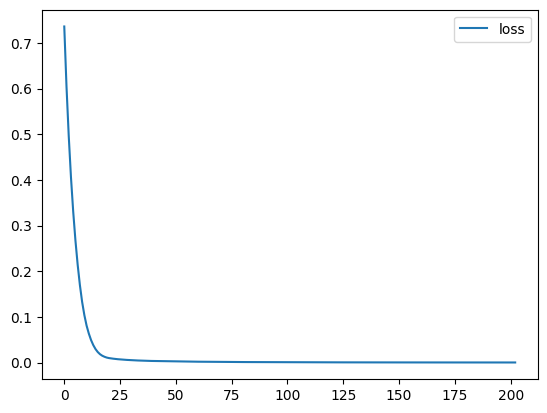

In [61]:
# loss 그래프 생성 ❼
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

In [62]:
# 테스트 데이터셋 생성 ❽
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # 테스트 정답 데이터

In [63]:
# RNN 모델 예측 및 로그 저장 ❾
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    train_y = model.predict(net_input, verbose=0)
    print(test_y.shape, train_y.shape, i, i + n_timesteps)
    test_y = np.append(test_y, train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

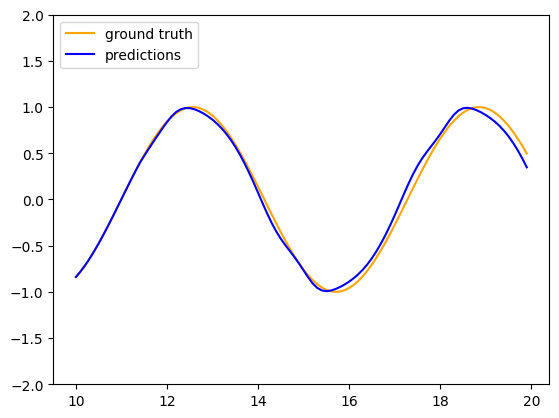

In [64]:
# 예측 결과 그래프 그리기 ❿
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predictions", color="blue")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()